This project is a sample for modeling the prediction of customers who are expected to invest in a CD using a decision tree classifier from Scikit Learn.  

This data comes from the Kaggle "Predict Term Deposit" dataset authored by Aslan Ahmedov which can be found here: https://www.kaggle.com/datasets/aslanahmedov/predict-term-deposit

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Data

In [42]:
data = pd.read_csv(r"marketing-deposits.csv")

Review Data

In [43]:
data.head()

,age,job type,marital status,education level,credit in default,account balance,housing loan,personal loan,deposit subscription
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no


In [44]:
data.describe()

,age,account balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'account balance'}>]], dtype=object)

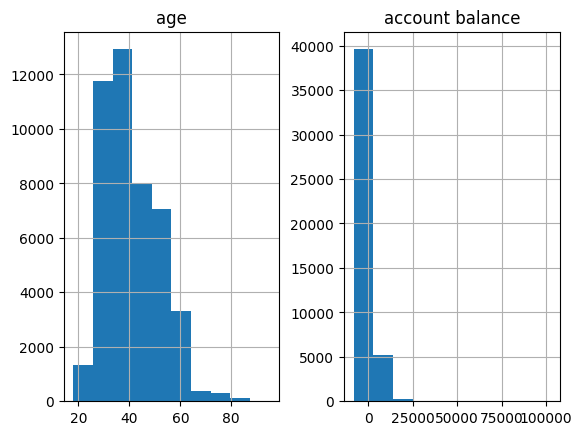

In [45]:
data.hist()

Modify categorical data for modeling

In [46]:
categorized_data = pd.get_dummies(data, drop_first=True)

In [47]:
categorized_data.head()

,age,account balance,job type_blue-collar,job type_entrepreneur,job type_housemaid,job type_management,job type_retired,job type_self-employed,job type_services,job type_student,...,job type_unknown,marital status_married,marital status_single,education level_secondary,education level_tertiary,education level_unknown,credit in default_yes,housing loan_yes,personal loan_yes,deposit subscription_yes
0,58,2143,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,44,29,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,33,2,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
3,47,1506,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,33,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


Implement an MLP Classifier and a Decision Tree Classifier and fit and evaluate the models

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
model = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
model.fit(categorized_data.iloc[:, :-1], categorized_data.loc[:, 'deposit subscription_yes'])
model.score(categorized_data.iloc[:, :-1], categorized_data.loc[:, 'deposit subscription_yes'])

0.8830151954170445

In [50]:
tree_model = DecisionTreeClassifier()
tree_model.fit(categorized_data.iloc[:, :-1], categorized_data.loc[:, 'deposit subscription_yes'])
tree_model.score(categorized_data.iloc[:, :-1], categorized_data.loc[:, 'deposit subscription_yes'])

0.9850257680652938

Top predictors for identifying whether or not a person is likely to subscribe to a deposit

In [51]:
pd.Series(tree_model.feature_importances_, index=categorized_data.iloc[:, :-1].columns).sort_values(ascending=False)

account balance              0.530166
age                          0.267228
job type_technician          0.019095
job type_management          0.018730
personal loan_yes            0.017697
education level_secondary    0.017403
housing loan_yes             0.015878
job type_blue-collar         0.014924
marital status_single        0.013276
job type_services            0.013273
marital status_married       0.011284
education level_unknown      0.010255
education level_tertiary     0.010231
job type_self-employed       0.008425
job type_unemployed          0.006654
job type_entrepreneur        0.005590
job type_student             0.005141
job type_retired             0.004638
job type_housemaid           0.004465
credit in default_yes        0.002951
job type_unknown             0.002695
dtype: float64

<AxesSubplot: title={'center': 'Histogram of Account Balance of Subscribers vs Non-Subscribers'}>

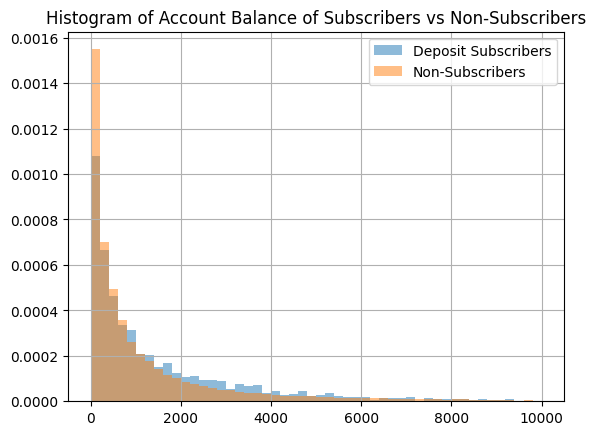

In [52]:
plt.title("Histogram of Account Balance of Subscribers vs Non-Subscribers")
categorized_data.loc[categorized_data.loc[:, 'deposit subscription_yes'] == 1, 'account balance'].rename('Deposit Subscribers').hist(alpha = 0.5, density = True, bins = 50, legend = True, range = (0, 10000))
categorized_data.loc[categorized_data.loc[:, 'deposit subscription_yes'] == 0, 'account balance'].rename("Non-Subscribers").hist(alpha = 0.5, density = True, bins = 50, legend = True, range = (0, 10000))